#### Предсказываем цену автомобиля

В папке лежит датасет Car details v3, в котором содержатся сведения об автомобилях, их характеристики и цены. Обучите модель линейной регрессии, которая будет предсказывать цену автомобиля по его характеристикам. 

Придется хорошенько поработать с характеристиками: это *творческая* часть задания. Во-первых, надо привести их в машиночитаемый вид, а во-вторых, можно посмотреть, как они коррелируют друг с другом и не нужно ли кого-то из них дропнуть или наоборот. 

*Примечание*: без работы над фичами за все дз - **0 баллов**. 

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pylab as plt


In [22]:
data = pd.read_csv(r'D:\\Car details v3.csv')
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [54]:
set(data.torque)

{'10.2@ 2,600(kgm@ rpm)',
 '10.4@ 3,200(kgm@ rpm)',
 '10.7@ 2,500(kgm@ rpm)',
 '10.7@ 2,600(kgm@ rpm)',
 '100Nm@ 2700rpm',
 '101Nm@ 3000rpm',
 '102Nm@ 2600rpm',
 '102Nm@ 4000rpm',
 '103Nm@ 4500rpm',
 '104Nm@ 3100rpm',
 '104Nm@ 4000rpm',
 '104Nm@ 4400rpm',
 '106.5Nm@ 4400rpm',
 '106Nm@ 2200rpm',
 '108.5Nm@ 5000rpm',
 '108Nm@ 4400rpm',
 '109Nm@ 4500rpm',
 '11.2@ 4,400(kgm@ rpm)',
 '11.3kgm@ 4700rpm',
 '11.4 kgm at 4,000 rpm',
 '11.4@ 4,000(kgm@ rpm)',
 '11.5@ 4,500(kgm@ rpm)',
 '11.8@ 3,200(kgm@ rpm)',
 '110(11.2)@ 4800',
 '110@ 3,000(kgm@ rpm)',
 '110Nm@ 3000-4300rpm',
 '110Nm@ 3000rpm',
 '110Nm@ 3750rpm',
 '110Nm@ 4000rpm',
 '110Nm@ 4400rpm',
 '110Nm@ 4500rpm',
 '110Nm@ 4800rpm',
 '111.7Nm@ 4000rpm',
 '111.8Nm@ 4000rpm',
 '112Nm@ 4000rpm',
 '113.75Nm@ 4000rpm',
 '113.75nm@ 4000rpm',
 '113.7Nm@ 4000rpm',
 '113.8Nm@ 4000rpm',
 '113Nm@ 3300rpm',
 '113Nm@ 4,500rpm',
 '113Nm@ 4200rpm',
 '113Nm@ 4400rpm',
 '113Nm@ 4500rpm',
 '113Nm@ 5000rpm',
 '113nm@ 4400rpm',
 '114.73Nm@ 4000rpm',
 '114.73

In [28]:
data.drop(['name'], axis=1, inplace=True)

In [55]:
data.drop(['torque'], axis=1, inplace=True) #честно говоря, просто не придумала, в какой вид это привести

In [29]:
data = pd.get_dummies(data, columns=['fuel'], drop_first=True)

In [30]:
def number_dealer(dealers):
    dct = {'Individual' : 1, 'Dealer' : 2, 'Trustmark Dealer' : 3}
    return dct[dealers]
    
data['seller_type'] = data['seller_type'].apply(number_dealer)
#мне показалось, что тут довольно очевидно продавец с ценой будет коррелировать


In [65]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [64]:
data = data.fillna(0)

In [66]:
def number_transmission(tr):
    dct = {'Automatic' : 0, 'Manual' : 1}
    return dct[tr]
    
data['transmission'] = data['transmission'].apply(number_transmission)

KeyError: 1

In [34]:
def number_owner(owners):
    dct = {'Fourth & Above Owner' : 0, 'Third Owner' : 1, 'Second Owner' : 2, 'First Owner' : 3, 'Test Drive Car' : 4}
    return dct[owners]
    
data['owner'] = data['owner'].apply(number_owner)

In [41]:
data = data[data['mileage'] != 'nan']

In [43]:
Correct_Mileage= []
for i in data.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))
    else:
        Correct_Mileage.append(float(i)) #мне пришлось дописать эту строчку, так что там, видимо, были цифры без единиц измерения, во что их переводить, я не знаю


data['mileage'] = Correct_Mileage

#код для перевода единиц измерения я сперла из интернета, простите(




In [48]:
def map_engine(eng):
    if str(eng).endswith('CC'):
        return float(eng[:-3])
    else:
        return float(eng)
    
data['engine'] = data['engine'].apply(map_engine)

In [53]:
def map_power(mp):
    if str(mp).endswith('bhp'):
        mp = mp[:-4]
        if mp == '':
            mp = 0
        return float(mp)
    else:
        return float(mp)
    
data['max_power'] = data['max_power'].apply(map_power)

In [56]:
data.head()

,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,1,1,3,23.0,1248.0,74.00,5.0,True,False,False
1,2014,370000,120000,1,1,2,21.1,1498.0,103.52,5.0,True,False,False
2,2006,158000,140000,1,1,1,17.0,1497.0,78.00,5.0,False,False,True
3,2010,225000,127000,1,1,3,23.0,1396.0,90.00,5.0,True,False,False
4,2007,130000,120000,1,1,3,16.0,1298.0,88.20,5.0,False,False,True


<Axes: >

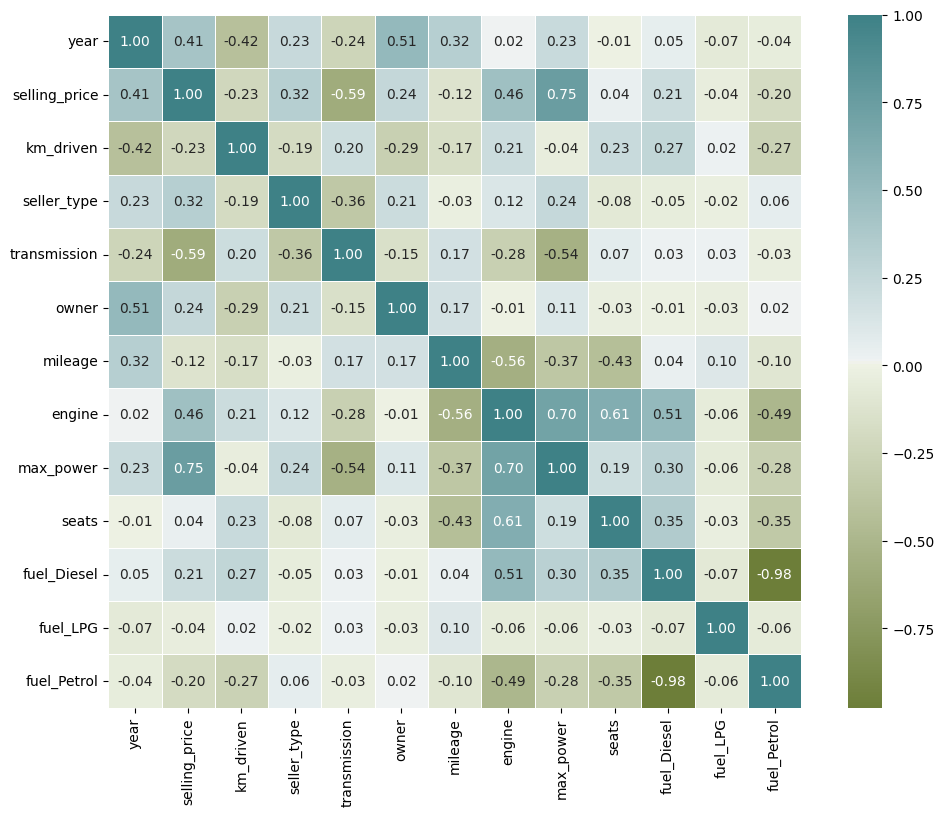

In [59]:

plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [73]:
X = data.copy().drop('selling_price', axis=1)

y = data['selling_price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

model = LinearRegression()

model.fit(Xtrain, ytrain) 

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)


In [75]:
mean_squared_error(pred_test, ytest) ** 0.5 

455614.4718575015

In [74]:
mean_squared_error(pred_train, ytrain) ** 0.5 
#ну с сегодняшними ценами на машины 400 тыс. -- это ерунда, наверное...

470637.29560993536